<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/Angola_FX_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading CSV files

In [ ]:
df = pd.read_csv('/Angola FX rates [shared with candidates] - Angola raw data.csv')

Reference list of date

In [ ]:
date_range = pd.date_range(start='2004-01-06', end='2023-11-30')

Checking for missing date

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
missing_dates = pd.DataFrame({'Date': date_range})
merged_df = pd.merge(missing_dates, df, on='Date', how='left')
missing_data = merged_df[merged_df.isnull().any(axis=1)]

Creating Pivot table

In [ ]:
pivot_table = merged_df.pivot_table(index='Date', aggfunc='count')
missing_pivot_table = pivot_table[pivot_table.isnull().any(axis=1)]

Removing weekend dates

In [ ]:
merged_df['Day_of_Week'] = merged_df['Date'].dt.dayofweek
cleaned_df = merged_df[~merged_df['Day_of_Week'].isin([5, 6])]

Plotting USD-KZ FX date

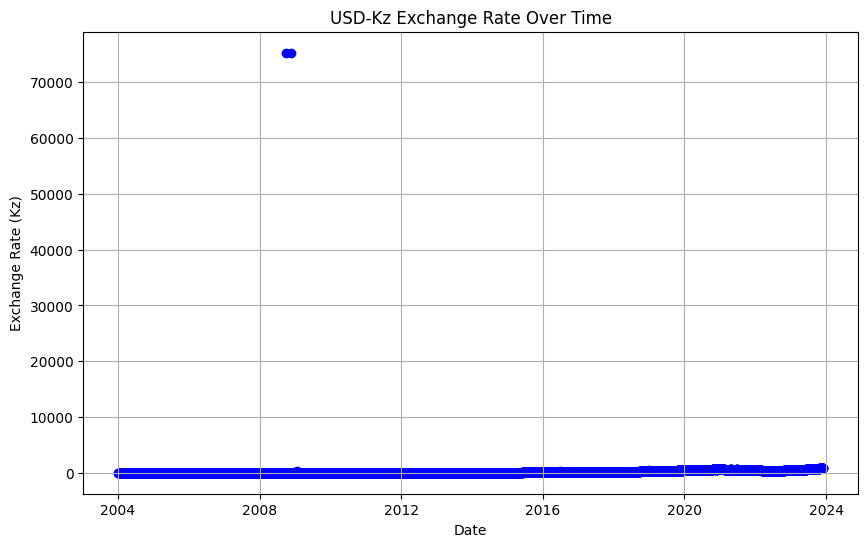

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Date'], cleaned_df['USD-kz'], color='blue')
plt.title('USD-Kz Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (Kz)')
plt.grid(True)
plt.show()

New dataset

In [ ]:
cleaned_df.to_csv('cleaned_angola_fx_data.csv', index=False)